## Maximum WWII - weather prediction Linear Regression Model

Is there a relationship between the daily minimum and maximum temperature? Can you predict the maximum temperature given the minimum temperature?

In [3]:
##importing all important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [26]:
## importing/reading data
weather = pd.read_csv('/config/workspace/Dataset/Summary of Weather.csv')
location = pd.read_csv('/config/workspace/Dataset/Weather Station Locations.csv')

In [27]:
weather.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
location.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [29]:
## selecting necessary features
weather = weather[['Date', 'MinTemp', 'MaxTemp']]

In [30]:
weather.head()

,Date,MinTemp,MaxTemp
0,1942-7-1,22.222222,25.555556
1,1942-7-2,21.666667,28.888889
2,1942-7-3,22.222222,26.111111
3,1942-7-4,22.222222,26.666667
4,1942-7-5,21.666667,26.666667


In [31]:
## checking object feature so we can convert into int /datetime
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Date     119040 non-null  object 
 1   MinTemp  119040 non-null  float64
 2   MaxTemp  119040 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.7+ MB


In [32]:
weather.describe()

,MinTemp,MaxTemp
count,119040.000000,119040.000000
mean,17.789511,27.045111
std,8.334572,8.717817
min,-38.333333,-33.333333
25%,15.000000,25.555556
50%,21.111111,29.444444
75%,23.333333,31.666667
max,34.444444,50.000000


In [33]:
weather.isnull().sum()

Date       0
MinTemp    0
MaxTemp    0
dtype: int64

In [34]:
weather['Date'] = pd.to_datetime(weather['Date'])

In [35]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   Date     119040 non-null  datetime64[ns]
 1   MinTemp  119040 non-null  float64       
 2   MaxTemp  119040 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.7 MB


In [36]:
## splittig the date column
weather['Year'] = weather["Date"].dt.year
weather['Month'] = weather["Date"].dt.month
weather['Day'] = weather["Date"].dt.day

In [37]:
weather.head()

,Date,MinTemp,MaxTemp,Year,Month,Day
0,1942-07-01,22.222222,25.555556,1942,7,1
1,1942-07-02,21.666667,28.888889,1942,7,2
2,1942-07-03,22.222222,26.111111,1942,7,3
3,1942-07-04,22.222222,26.666667,1942,7,4
4,1942-07-05,21.666667,26.666667,1942,7,5


In [38]:
weather.drop('Date',axis =1 , inplace=True)

In [39]:
weather

,MinTemp,MaxTemp,Year,Month,Day
0,22.222222,25.555556,1942,7,1
1,21.666667,28.888889,1942,7,2
2,22.222222,26.111111,1942,7,3
3,22.222222,26.666667,1942,7,4
4,21.666667,26.666667,1942,7,5
...,...,...,...,...,...
119035,18.333333,28.333333,1945,12,27
119036,18.333333,29.444444,1945,12,28
119037,18.333333,28.333333,1945,12,29
119038,18.333333,28.333333,1945,12,30


## EDA - MaxTemp & MinTemp (GROUPBY according to year & months)

In [40]:
## minimum average temp and max avg. temp
mintemp = weather.groupby(['Year','Month'])['MinTemp'].mean().reset_index()
maxtemp = weather.groupby(['Year','Month'])['MaxTemp'].mean().reset_index()

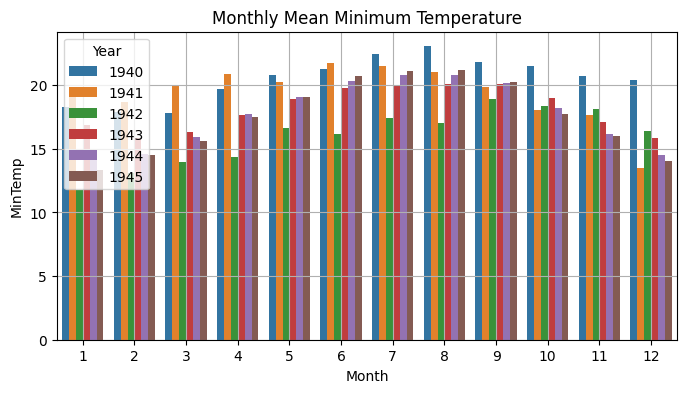

In [41]:
plt.figure(figsize=(8,4))
sns.barplot(data =mintemp , x = 'Month', y = 'MinTemp',hue = "Year" )
plt.title('Monthly Mean Minimum Temperature')
plt.grid()
plt.show()

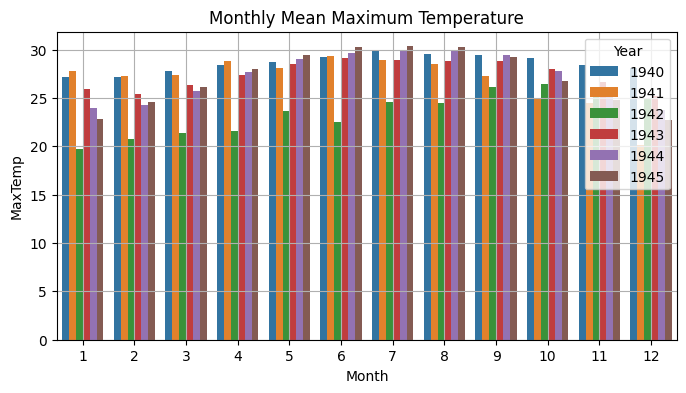

In [42]:
plt.figure(figsize=(8,4))
sns.barplot(data =maxtemp , x = 'Month', y = 'MaxTemp',hue = "Year" )
plt.title('Monthly Mean Maximum Temperature')
plt.grid()
plt.show()

# Maximum and minimum Temp per each month and year

In [43]:
var_min = weather.groupby(["Year","Month"])["MinTemp"].min().reset_index()
var_max = weather.groupby(["Year","Month"])["MaxTemp"].min().reset_index()

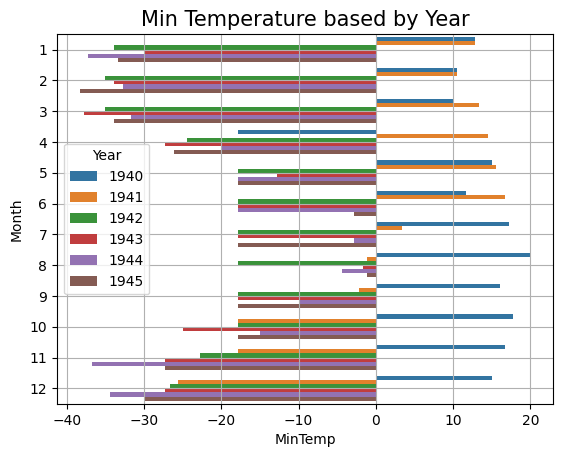

In [44]:
sns.barplot(data = var_min, x = "MinTemp" , y = "Month" ,hue = "Year", orient="h" )
plt.title('Min Temperature based by Year',fontsize = 15)
plt.grid()
plt.show()

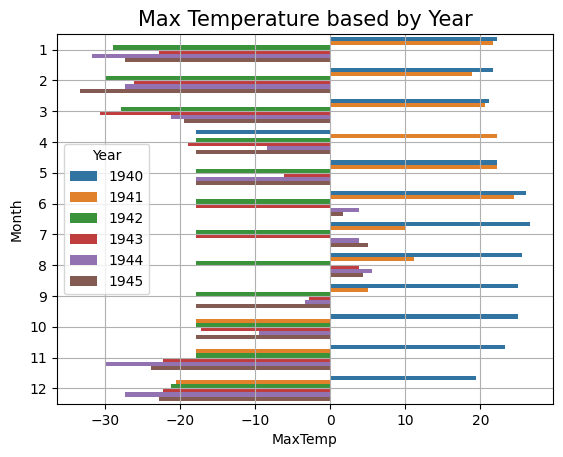

In [45]:
sns.barplot(data = var_max, x = "MaxTemp" , y = "Month" ,hue = "Year", orient="h" )
plt.title('Max Temperature based by Year',fontsize = 15)
plt.grid()
plt.show()

## Model

In [46]:
weather.head()

,MinTemp,MaxTemp,Year,Month,Day
0,22.222222,25.555556,1942,7,1
1,21.666667,28.888889,1942,7,2
2,22.222222,26.111111,1942,7,3
3,22.222222,26.666667,1942,7,4
4,21.666667,26.666667,1942,7,5


In [47]:
x = weather[['MinTemp']]
y = weather['MaxTemp']

In [48]:
y

0         25.555556
1         28.888889
2         26.111111
3         26.666667
4         26.666667
            ...    
119035    28.333333
119036    29.444444
119037    28.333333
119038    28.333333
119039    29.444444
Name: MaxTemp, Length: 119040, dtype: float64

In [49]:
## spliting the x and y features
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [51]:
x_train.shape,x_test.shape

((89280, 1), (29760, 1))

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [55]:
x_train_scaled

array([[-1.86751013],
       [ 0.59872715],
       [-1.7342    ],
       ...,
       [-1.7342    ],
       [ 0.86534739],
       [-1.46757976]])

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
regressor = LinearRegression()

In [58]:
regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [59]:
y_pred = regressor.predict(x_test_scaled)

In [60]:
y_pred

array([31.63158077, 34.69367094, 33.16262585, ..., 30.61088405,
       33.67297421, 29.59018733])

In [61]:
from sklearn.metrics import mean_squared_error,r2_score

In [62]:
print("Mean sq. error of Model =" , round(mean_squared_error(y_test,y_pred),3))
print("Accuracy of Model =" ,round(r2_score(y_test,y_pred)*100,3),"%")

Mean sq. error of Model = 17.504
Accuracy of Model = 77.025 %


-------------------------